# Лабораторна робота №4
----
## ( 1 РІВЕНЬ)
----

In [39]:
import pandas as pd
import numpy as np
import timeit
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
print("Ready!")

Ready!


### Dataframe

In [40]:
start_time = timeit.default_timer()
names = ['date', 'time', 'global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 
                'sub_metering_2', 'sub_metering_3']

df = pd.read_csv('household_power_consumption.txt', sep=';', header=0, names = names, low_memory = False)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 
                'sub_metering_2', 'sub_metering_3']] = df[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 
                'sub_metering_2', 'sub_metering_3']].astype(float)
df['date'] = pd.to_datetime(df['date'], dayfirst=True) 
stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)
print(df.head())
print(df.info())


Exec time:  6.451808499987237
        date      time  global_active_power  global_reactive_power  voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   
3 2006-12-16  17:27:00                5.388                  0.502   233.74   
4 2006-12-16  17:28:00                3.666                  0.528   235.68   

   global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258

### Array

In [41]:
start_time = timeit.default_timer()

dtype = [('date', 'U10'), ('time', 'U8'), ('global_active_power', float), ('global_reactive_power', float), ('voltage', float), ('global_intensity', float), ('sub_metering_1', float), ('sub_metering_2', float), ('sub_metering_3', float)]
data = np.genfromtxt('household_power_consumption.txt', delimiter=';', skip_header=1, dtype=dtype, filling_values=0)

stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)
print(data[:5])


Exec time:  12.940212999936193
[('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.)
 ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0., 1., 17.)
 ('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)]


---
## 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.
---

In [42]:
start_time = timeit.default_timer()
filtered_df = df[df['global_active_power'] > 5]
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(filtered_df.head())


Exec time:  0.007049499894492328
         date      time  global_active_power  global_reactive_power  voltage  \
1  2006-12-16  17:25:00                5.360                  0.436   233.63   
2  2006-12-16  17:26:00                5.374                  0.498   233.29   
3  2006-12-16  17:27:00                5.388                  0.502   233.74   
11 2006-12-16  17:35:00                5.412                  0.470   232.78   
12 2006-12-16  17:36:00                5.224                  0.478   232.99   

    global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
1               23.0             0.0             1.0            16.0  
2               23.0             0.0             2.0            17.0  
3               23.0             0.0             1.0            17.0  
11              23.2             0.0             1.0            17.0  
12              22.4             0.0             1.0            16.0  


In [43]:
start_time = timeit.default_timer()
filtered = np.where(data['global_active_power'] > 5)
filtered_data = data[filtered]
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(filtered_data[:5])


Exec time:  0.025539099937304854
[('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0., 1., 17.)
 ('16/12/2006', '17:35:00', 5.412, 0.47 , 232.78, 23.2, 0., 1., 17.)
 ('16/12/2006', '17:36:00', 5.224, 0.478, 232.99, 22.4, 0., 1., 16.)]


---
## 2. Обрати всі домогосподарства, у яких вольтаж перевищує 235 В.
---

In [44]:
start_time = timeit.default_timer()
filtered_df = df[df['voltage'] > 235]
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(filtered_df.head())


Exec time:  0.15322720003314316
         date      time  global_active_power  global_reactive_power  voltage  \
4  2006-12-16  17:28:00                3.666                  0.528   235.68   
5  2006-12-16  17:29:00                3.520                  0.522   235.02   
6  2006-12-16  17:30:00                3.702                  0.520   235.09   
7  2006-12-16  17:31:00                3.700                  0.520   235.22   
14 2006-12-16  17:38:00                4.054                  0.422   235.24   

    global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
4               15.8             0.0             1.0            17.0  
5               15.0             0.0             2.0            17.0  
6               15.8             0.0             1.0            17.0  
7               15.8             0.0             1.0            17.0  
14              17.6             0.0             1.0            17.0  


In [45]:
start_time = timeit.default_timer()
filtered = np.where(data['voltage'] > 235)
filtered_data = data[filtered]
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(filtered_data[:5])


Exec time:  0.2264279000228271
[('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.)
 ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:31:00', 3.7  , 0.52 , 235.22, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:38:00', 4.054, 0.422, 235.24, 17.6, 0., 1., 17.)]


---
## 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.
---

In [46]:
start_time = timeit.default_timer()
filtered_df = df[(df['global_intensity'] >= 19) & (df['global_intensity'] <= 20) & (df['sub_metering_2'] > df['sub_metering_3'])]
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(filtered_df.head())


Exec time:  0.024505100096575916
          date      time  global_active_power  global_reactive_power  voltage  \
45  2006-12-16  18:09:00                4.464                  0.136   234.66   
460 2006-12-17  01:04:00                4.582                  0.258   238.08   
464 2006-12-17  01:08:00                4.618                  0.104   239.61   
475 2006-12-17  01:19:00                4.636                  0.140   237.37   
476 2006-12-17  01:20:00                4.634                  0.152   237.17   

     global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
45               19.0             0.0            37.0            16.0  
460              19.6             0.0            13.0             0.0  
464              19.6             0.0            27.0             0.0  
475              19.4             0.0            36.0             0.0  
476              19.4             0.0            35.0             0.0  


In [47]:
start_time = timeit.default_timer()
filtered_data = data[((data['global_intensity'] >= 19) & (data['global_intensity'] <= 20)) & ((data['sub_metering_2'] > data['sub_metering_3']))]
stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)
print(filtered_data[:5])


Exec time:  0.045437099994160235
[('16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19. , 0., 37., 16.)
 ('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.)
 ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.)
 ('17/12/2006', '01:19:00', 4.636, 0.14 , 237.37, 19.4, 0., 36.,  0.)
 ('17/12/2006', '01:20:00', 4.634, 0.152, 237.17, 19.4, 0., 35.,  0.)]


---
## 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії.
---

In [48]:
start_time = timeit.default_timer()

sample_df = df.sample(n=500000, replace=False, random_state=42)

mean_sub1 = sample_df['sub_metering_1'].mean()
mean_sub2 = sample_df['sub_metering_2'].mean()
mean_sub3 = sample_df['sub_metering_3'].mean()

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)

print("Mean sub_metering_1:", mean_sub1)
print("Mean sub_metering_2:", mean_sub2)
print("Mean sub_metering_3:", mean_sub3)


Exec time:  0.21153950004372746
Mean sub_metering_1: 1.119258
Mean sub_metering_2: 1.308912
Mean sub_metering_3: 6.45295


In [49]:
start_time = timeit.default_timer()

sample_indices = np.random.choice(len(data), size=500000, replace=False)
random_data = data[sample_indices]

sub1 = random_data['sub_metering_1']
sub2 = random_data['sub_metering_2']
sub3 = random_data['sub_metering_3']

mean_sub1 = np.mean(sub1)
mean_sub2 = np.mean(sub2)
mean_sub3 = np.mean(sub3)

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Mean sub_metering_1:", mean_sub1)
print("Mean sub_metering_2:", mean_sub2)
print("Mean sub_metering_3:", mean_sub3)


Exec time:  0.19031709991395473
Mean sub_metering_1: 1.107582
Mean sub_metering_2: 1.280592
Mean sub_metering_3: 6.371108


---
## 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.
---

In [50]:
start_time = timeit.default_timer()

filtered_df = df[(df['time'] > '18:00:00') & (df['global_active_power'] > 6) & (df['sub_metering_2'] > df['sub_metering_1']) & 
                    (df['sub_metering_2'] > df['sub_metering_3'])]

first = filtered_df.iloc[0:len(filtered_df)//2:3]
second = filtered_df.iloc[len(filtered_df)//2:len(filtered_df):4]
result = pd.concat([first, second])

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(result.head())


Exec time:  0.10802339995279908
            date      time  global_active_power  global_reactive_power  \
41    2006-12-16  18:05:00                6.052                  0.192   
44    2006-12-16  18:08:00                6.308                  0.116   
17494 2006-12-28  20:58:00                6.386                  0.374   
17498 2006-12-28  21:02:00                8.088                  0.262   
17501 2006-12-28  21:05:00                7.230                  0.152   

       voltage  global_intensity  sub_metering_1  sub_metering_2  \
41      232.93              26.2             0.0            37.0   
44      232.25              27.0             0.0            36.0   
17494   236.63              27.0             1.0            36.0   
17498   235.50              34.4             1.0            72.0   
17501   235.22              30.6             1.0            73.0   

       sub_metering_3  
41               17.0  
44               17.0  
17494            17.0  
17498            

In [51]:
start_time = timeit.default_timer()

filtered_data1 = np.where((data['time'] > '18:00:00') & (data['global_active_power'] > 6) & (data['sub_metering_2'] > data['sub_metering_1']) & 
                               (data['sub_metering_2'] > data['sub_metering_3']))
filtered_data = data[filtered_data1]

first = np.arange(0, len(filtered_data)//2, 3)
second = np.arange(len(filtered_data)//2, len(filtered_data), 4)

first_half = filtered_data[:len(filtered_data)//2: 3]
second_half = filtered_data[len(filtered_data)//2::4]

result = np.concatenate([first_half, second_half])

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(result[:5])


Exec time:  0.08511760004330426
[('16/12/2006', '18:05:00', 6.052, 0.192, 232.93, 26.2, 0., 37., 17.)
 ('16/12/2006', '18:08:00', 6.308, 0.116, 232.25, 27. , 0., 36., 17.)
 ('28/12/2006', '20:58:00', 6.386, 0.374, 236.63, 27. , 1., 36., 17.)
 ('28/12/2006', '21:02:00', 8.088, 0.262, 235.5 , 34.4, 1., 72., 17.)
 ('28/12/2006', '21:05:00', 7.23 , 0.152, 235.22, 30.6, 1., 73., 17.)]


----
## ( 2 РІВЕНЬ)
----

In [52]:
start_time = timeit.default_timer()
headers = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
           'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
           'horsepower','peak-rpm','city-mpg','highway-mpg','price']
df = pd.read_csv('automobile/imports-85.data', names=headers)
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(df.head())


Exec time:  0.05255240004044026
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  b

In [53]:
start_time = timeit.default_timer()

data = np.genfromtxt('automobile/imports-85.data', delimiter=',', dtype=str)
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(data[:5])


Exec time:  0.020190499955788255
[['3' '?' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '13495']
 ['3' '?' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '16500']
 ['1' '?' 'alfa-romero' 'gas' 'std' 'two' 'hatchback' 'rwd' 'front'
  '94.50' '171.20' '65.50' '52.40' '2823' 'ohcv' 'six' '152' 'mpfi'
  '2.68' '3.47' '9.00' '154' '5000' '19' '26' '16500']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '99.80'
  '176.60' '66.20' '54.30' '2337' 'ohc' 'four' '109' 'mpfi' '3.19' '3.40'
  '10.00' '102' '5500' '24' '30' '13950']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' '4wd' 'front' '99.40'
  '176.60' '66.40' '54.30' '2824' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.00' '115' '5500' '18' '22' '17450']]


---
## 1. Поборотися із зниклими даними.
---

In [54]:
df_copy = df.copy()

start_time = timeit.default_timer()

df_copy.replace('?', np.nan, inplace=True)
df_copy.dropna(inplace=True)

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)

print(df_copy.head())


Exec time:  0.0024374000495299697
    symboling normalized-losses  make fuel-type aspiration num-of-doors  \
3           2               164  audi       gas        std         four   
4           2               164  audi       gas        std         four   
6           1               158  audi       gas        std         four   
8           1               158  audi       gas      turbo         four   
10          2               192   bmw       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
3       sedan          fwd           front        99.8  ...          109   
4       sedan          4wd           front        99.4  ...          136   
6       sedan          fwd           front       105.8  ...          136   
8       sedan          fwd           front       105.8  ...          131   
10      sedan          rwd           front       101.2  ...          108   

    fuel-system  bore  stroke compression-ratio horsepowe

In [55]:
data_copy = data.copy()
start_time = timeit.default_timer()

data_copy[data_copy == '?'] = np.nan
data_clean = data_copy[~np.any(data_copy == "nan", axis=1)]
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(data_clean[:5])


Exec time:  0.0008434999035671353
[['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '99.80'
  '176.60' '66.20' '54.30' '2337' 'ohc' 'four' '109' 'mpfi' '3.19' '3.40'
  '10.00' '102' '5500' '24' '30' '13950']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' '4wd' 'front' '99.40'
  '176.60' '66.40' '54.30' '2824' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.00' '115' '5500' '18' '22' '17450']
 ['1' '158' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '105.80'
  '192.70' '71.40' '55.70' '2844' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.50' '110' '5500' '19' '25' '17710']
 ['1' '158' 'audi' 'gas' 'turbo' 'four' 'sedan' 'fwd' 'front' '105.80'
  '192.70' '71.40' '55.90' '3086' 'ohc' 'five' '131' 'mpfi' '3.13' '3.40'
  '8.30' '140' '5500' '17' '20' '23875']
 ['2' '192' 'bmw' 'gas' 'std' 'two' 'sedan' 'rwd' 'front' '101.20'
  '176.80' '64.80' '54.30' '2395' 'ohc' 'four' '108' 'mpfi' '3.50' '2.80'
  '8.80' '101' '5800' '23' '29' '16430']]


In [56]:
columns = ['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
start_time = timeit.default_timer()
df.replace('?', np.nan, inplace=True)

for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(df.head())


Exec time:  0.012426599976606667
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               161  alfa-romero       gas        std          two   
1          3               161  alfa-romero       gas        std          two   
2          1               161  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  

In [57]:
start_time = timeit.default_timer()
def mode(array):
    modes = []
    for column in array.T:
        clean_column = column[column != '?']
        unique, number = np.unique(clean_column, return_counts=True)
        mode_index = np.argmax(number)
        mode_value = unique[mode_index]
        modes.append(mode_value)
    return modes

def replace(array, modes):
    for i, column in enumerate(array.T):
        missing = np.where(column == '?')[0]
        column[missing] = modes[i]

modes = mode(data)
replace(data, modes)
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(data[:5])
print(modes)


Exec time:  0.0039820000529289246
[['3' '161' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '13495']
 ['3' '161' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '16500']
 ['1' '161' 'alfa-romero' 'gas' 'std' 'two' 'hatchback' 'rwd' 'front'
  '94.50' '171.20' '65.50' '52.40' '2823' 'ohcv' 'six' '152' 'mpfi'
  '2.68' '3.47' '9.00' '154' '5000' '19' '26' '16500']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '99.80'
  '176.60' '66.20' '54.30' '2337' 'ohc' 'four' '109' 'mpfi' '3.19' '3.40'
  '10.00' '102' '5500' '24' '30' '13950']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' '4wd' 'front' '99.40'
  '176.60' '66.40' '54.30' '2824' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.00' '115' '5500' '18' '22' '17450']]
[np.str_('0'

---
## 2. Пронормувати вибраний датасет або стандартизувати його
---

In [58]:
num_columns = df.select_dtypes(include=['int', 'float'])

start_time = timeit.default_timer()
for column in num_columns:
    mean = df[column].mean()
    std = df[column].std()
    standardized = (df[column] - mean) / std
    df[column] = standardized
    
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Standart:")
print(df.head())

start_time = timeit.default_timer()
for column in num_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    normalized = (df[column] - min_val) / (max_val - min_val)
    df[column] = normalized 


stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Norm:")
print(df.head())




Exec time:  0.006669499911367893
Standart:
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0   1.739213               161  alfa-romero       gas        std          two   
1   1.739213               161  alfa-romero       gas        std          two   
2   0.133183               161  alfa-romero       gas        std          two   
3   0.936198               164         audi       gas        std         four   
4   0.936198               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front   -1.686643  ...     0.074267   
1  convertible          rwd           front   -1.686643  ...     0.074267   
2    hatchback          rwd           front   -0.706865  ...     0.602571   
3        sedan          fwd           front    0.173274  ...    -0.430023   
4        sedan          4wd           front    0.106848  ...     0.218350   

   fue

In [59]:
column_indx = [0, 9, 10, 11, 12, 13, 16, 20, 23, 24]


start_time = timeit.default_timer()
for column_index in column_indx:
    column = data[:, column_index].astype(float)
    mean = np.mean(column)
    std = np.std(column)
    standardized = (column - mean) / std
    data[:, column_index] = standardized
    

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Standart:")
print(data[:5])

start_time = timeit.default_timer()
for column_index in column_indx:
    column = data[:, column_index].astype(float)
    min_val = np.min(column)
    max_val = np.max(column)
    normalized = (column - min_val) / (max_val - min_val)
    data[:, column_index] = normalized
    
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Norm:")
print(data[:5])



Exec time:  0.004975100047886372
Standart:
[['1.74347043219' '161' 'alfa-romero' 'gas' 'std' 'two' 'convertible'
  'rwd' 'front' '-1.6907718018' '-0.4265214683' '-0.8447823517'
  '-2.0204173044' '-0.0145662821' 'dohc' 'four' '0.07444892511' 'mpfi'
  '3.47' '2.68' '-0.2883489098' '111' '5000' '-0.6465530277'
  '-0.5460587369' '13495']
 ['1.74347043219' '161' 'alfa-romero' 'gas' 'std' 'two' 'convertible'
  'rwd' 'front' '-1.6907718018' '-0.4265214683' '-0.8447823517'
  '-2.0204173044' '-0.0145662821' 'dohc' 'four' '0.07444892511' 'mpfi'
  '3.47' '2.68' '-0.2883489098' '111' '5000' '-0.6465530277'
  '-0.5460587369' '16500']
 ['0.13350899705' '161' 'alfa-romero' 'gas' 'std' 'two' 'hatchback' 'rwd'
  'front' '-0.7085958764' '-0.2315130468' '-0.1905661214' '-0.5435274761'
  '0.51488191613' 'ohcv' 'six' '0.60404616844' 'mpfi' '2.68' '3.47'
  '-0.2883489098' '154' '5000' '-0.9530116883' '-0.6916270607' '16500']
 ['0.93848971462' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front'
  '0.17369

---
## 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
---

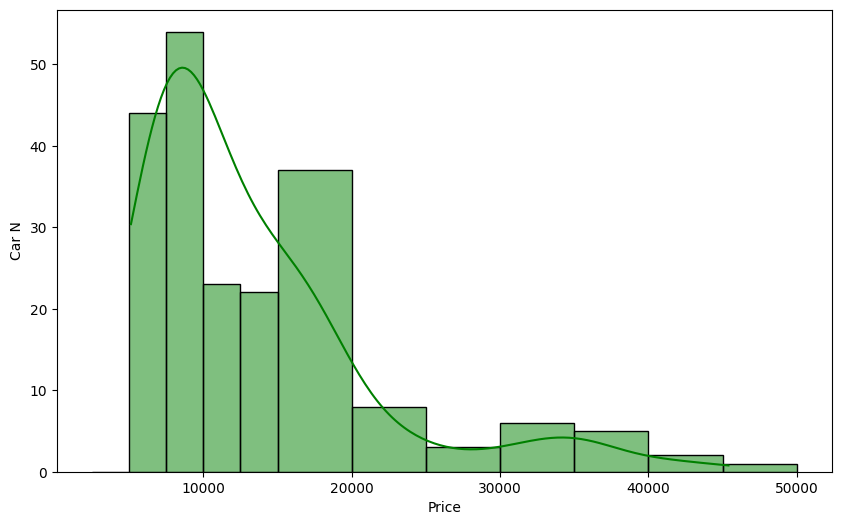


Exec time:  0.12338589993305504


In [60]:
start_time = timeit.default_timer()
df['price'] = pd.to_numeric(df['price'])
price_ranges = [2500, 5000, 7500, 10000, 12500, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=price_ranges, kde=True, color='green')
plt.xlabel('Price')
plt.ylabel('Car N')
plt.show()
stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)


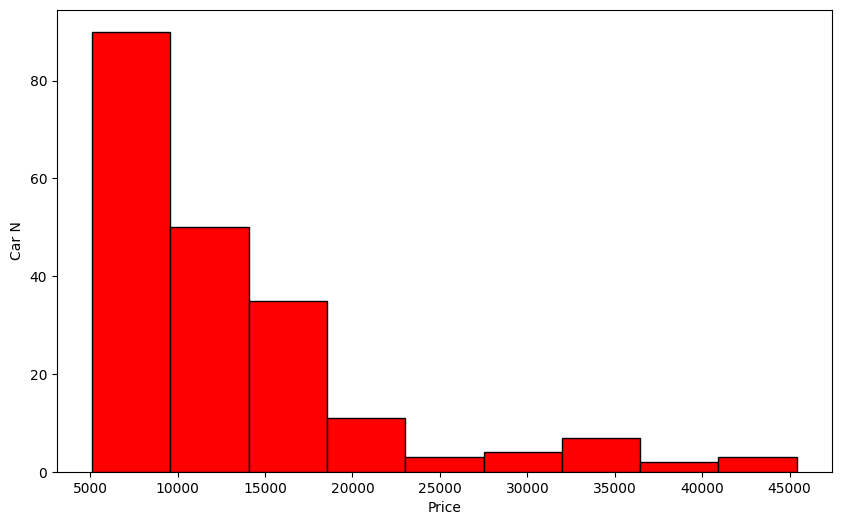


Exec time:  0.9089575000107288


In [61]:
start_time = timeit.default_timer()
price_dat = data[:, 25].astype(float)

min_price = np.min(price_dat)
max_price = np.max(price_dat)
price_ranges = np.linspace(min_price, max_price, 10)

plt.figure(figsize=(10, 6))
plt.hist(price_dat, bins=price_ranges, color='red', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Car N')
plt.show()
plt.show()
stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)

---
## 4. Збудувати графік залежності одного integer/real атрибута від іншого.
---

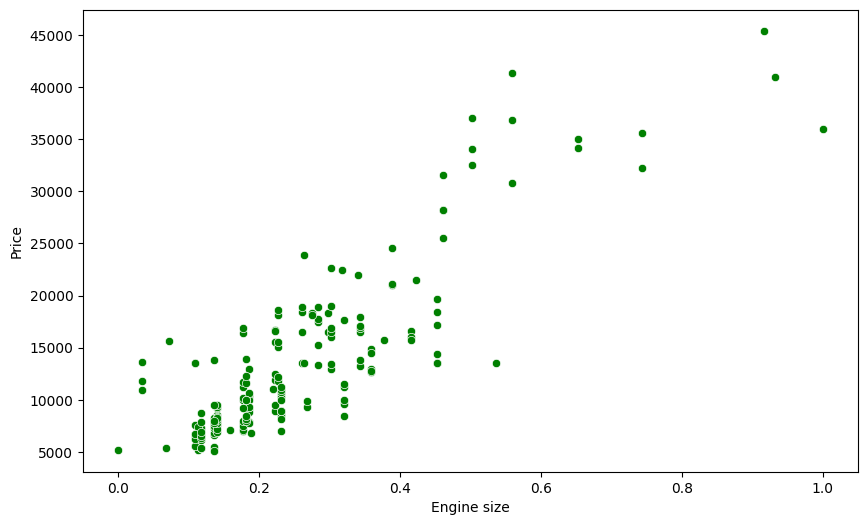


Exec time:  0.13301750004757196


In [62]:
start_time = timeit.default_timer()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='engine-size', y='price', color='green')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.show()
stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)

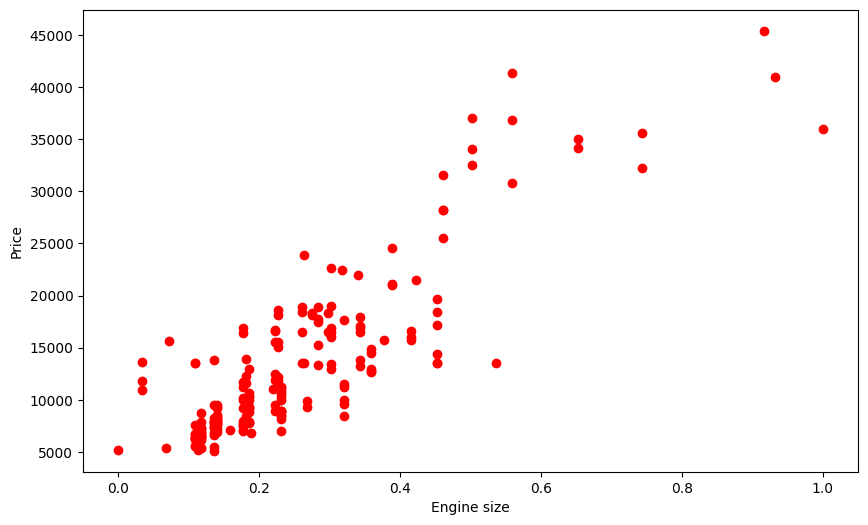


Exec time:  0.12424369994550943


In [63]:
start_time = timeit.default_timer()
engine_size = data[:, 16].astype(float)
price = data[:, 25].astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(engine_size, price, color='red')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.show()
stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)

---
## 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.
---


In [64]:
start_time = timeit.default_timer()
x = df['engine-size'].astype(float)
y = df['price'].astype(float)

pearson, _ = pearsonr(x, y)
spearman, _ = spearmanr(x, y)

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Pirc:", pearson)
print("Spirc:", spearman)


Exec time:  0.0028063999488949776
Pirc: 0.8617686631091567
Spirc: 0.8065679862276255


In [65]:
start_time = timeit.default_timer()
x = data[:, 16].astype(float)
y = data[:, 25].astype(float)

pearson, _ = pearsonr(x, y)
spearman, _ = spearmanr(x, y)

stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print("Pirc:", pearson)
print("Spirc:", spearman)



Exec time:  0.0024114999687299132
Pirc: 0.8617686631079031
Spirc: 0.8065679862276255


---
## 6. Провести One Hot Encoding категоріального string атрибуту.
---

In [66]:
df_copy = df.copy()

start_time = timeit.default_timer()
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(df_copy[['body-style']]).toarray()

df_result = pd.DataFrame(x, columns=onehotencoder.get_feature_names_out(['body-style']))

df_copy = pd.concat([df_copy, df_result], axis=1)
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(df_copy.head())


Exec time:  0.0037711000768467784
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0        1.0               161  alfa-romero       gas        std          two   
1        1.0               161  alfa-romero       gas        std          two   
2        0.6               161  alfa-romero       gas        std          two   
3        0.8               164         audi       gas        std         four   
4        0.8               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  horsepower  \
0  convertible          rwd           front    0.058309  ...         111   
1  convertible          rwd           front    0.058309  ...         111   
2    hatchback          rwd           front    0.230321  ...         154   
3        sedan          fwd           front    0.384840  ...         102   
4        sedan          4wd           front    0.373178  ...         115   

   peak-rpm  city-mpg

In [67]:
data_copy = data.copy()

start_time = timeit.default_timer()

data_encod = data_copy[:, [6]]
onehotencoder = OneHotEncoder()

encoded_data = onehotencoder.fit_transform(data_encod).toarray()
data_encoded = np.hstack((data_copy[:, :6], encoded_data, data_copy[:, 7:]))
stop_time = timeit.default_timer()

print("\nExec time: ", stop_time - start_time)
print(data_encoded[:5])


Exec time:  0.0022389000514522195
[['1.0' '161' 'alfa-romero' 'gas' 'std' 'two' '1.0' '0.0' '0.0' '0.0'
  '0.0' 'rwd' 'front' '0.05830903789' '0.41343283582' '0.31666666666'
  '0.08333333334' '0.41117145074' 'dohc' 'four' '0.26037735847' 'mpfi'
  '3.47' '2.68' '0.12500000000' '111' '5000' '0.22222222222'
  '0.28947368421' '13495']
 ['1.0' '161' 'alfa-romero' 'gas' 'std' 'two' '1.0' '0.0' '0.0' '0.0'
  '0.0' 'rwd' 'front' '0.05830903789' '0.41343283582' '0.31666666666'
  '0.08333333334' '0.41117145074' 'dohc' 'four' '0.26037735847' 'mpfi'
  '3.47' '2.68' '0.12500000000' '111' '5000' '0.22222222222'
  '0.28947368421' '16500']
 ['0.59999999999' '161' 'alfa-romero' 'gas' 'std' 'two' '0.0' '0.0' '1.0'
  '0.0' '0.0' 'rwd' 'front' '0.23032069969' '0.44925373133'
  '0.43333333333' '0.38333333333' '0.51784328936' 'ohcv' 'six'
  '0.34339622640' 'mpfi' '2.68' '3.47' '0.12500000000' '154' '5000'
  '0.16666666665' '0.26315789475' '16500']
 ['0.79999999999' '164' 'audi' 'gas' 'std' 'four' '0.0' '0.

---
## 7. Провести візуалізацію багатовимірних даних.
---

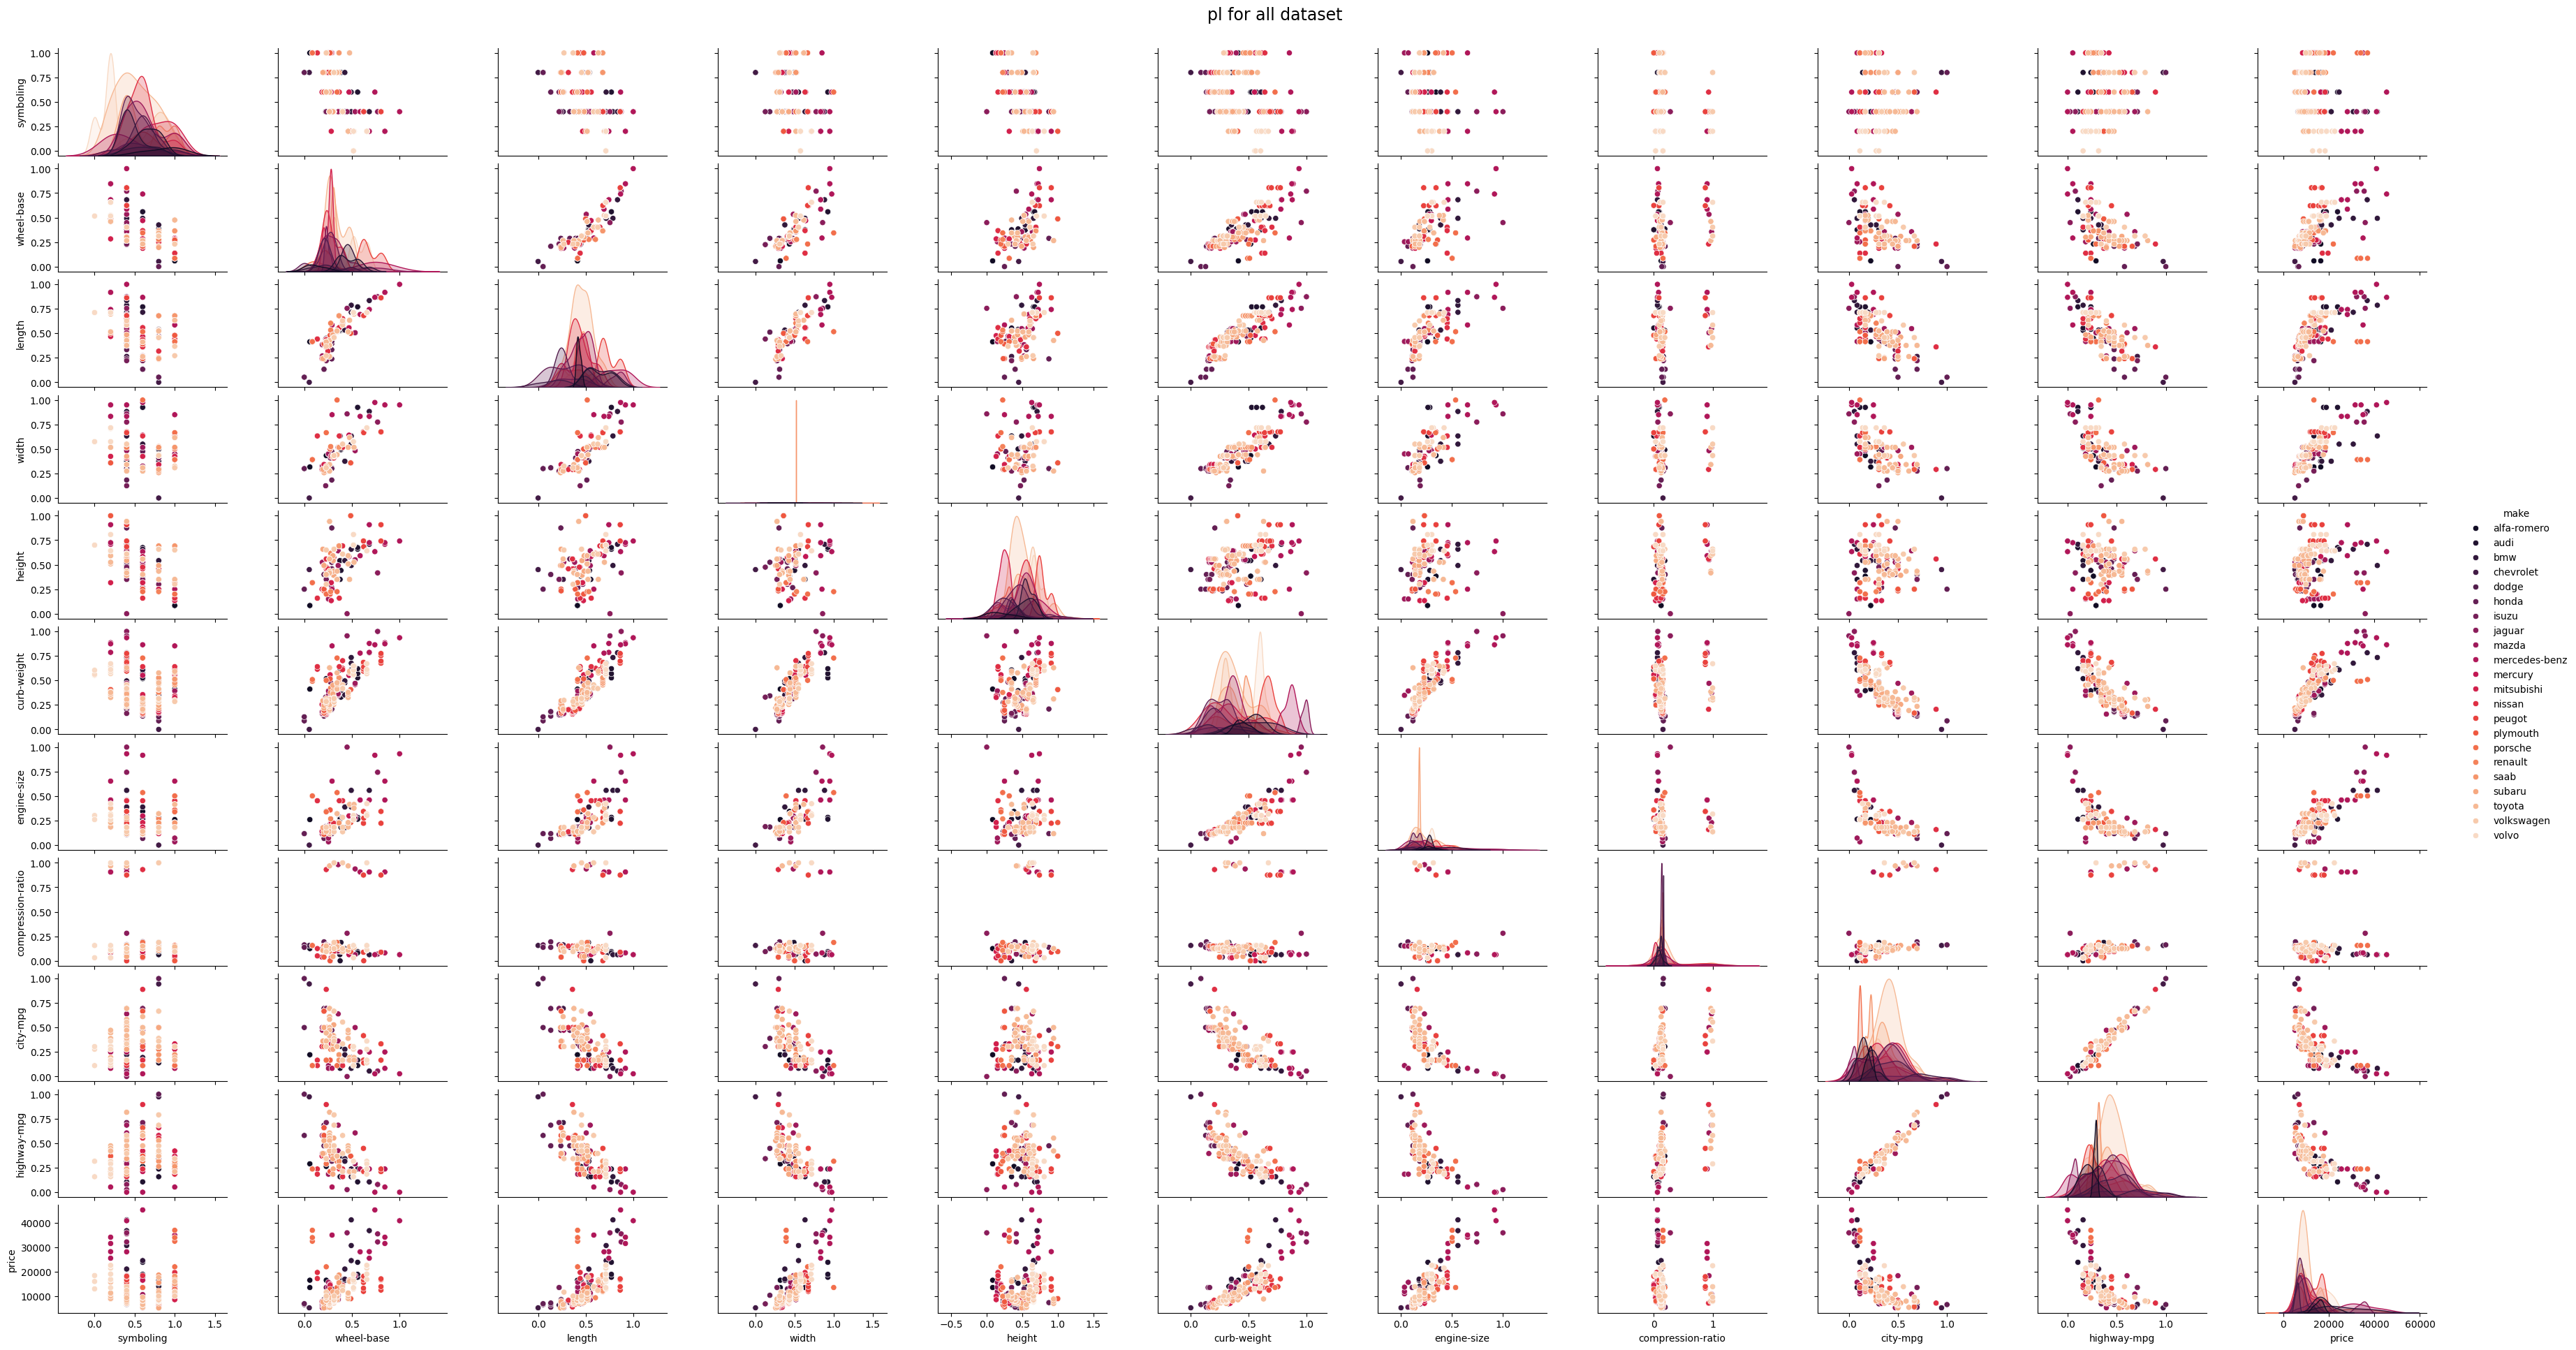


Exec time:  21.19959920004476


In [68]:

start_time = timeit.default_timer()

cols = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
           'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
           'horsepower','peak-rpm','city-mpg','highway-mpg','price']

pl = sns.pairplot(df[cols], hue='make', height=1.8, aspect=1.8, palette='rocket')
fig = pl.figure
fig.subplots_adjust(top=0.95, wspace=0.3)
title = fig.suptitle('pl for all dataset', fontsize=17)
plt.show()


stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)


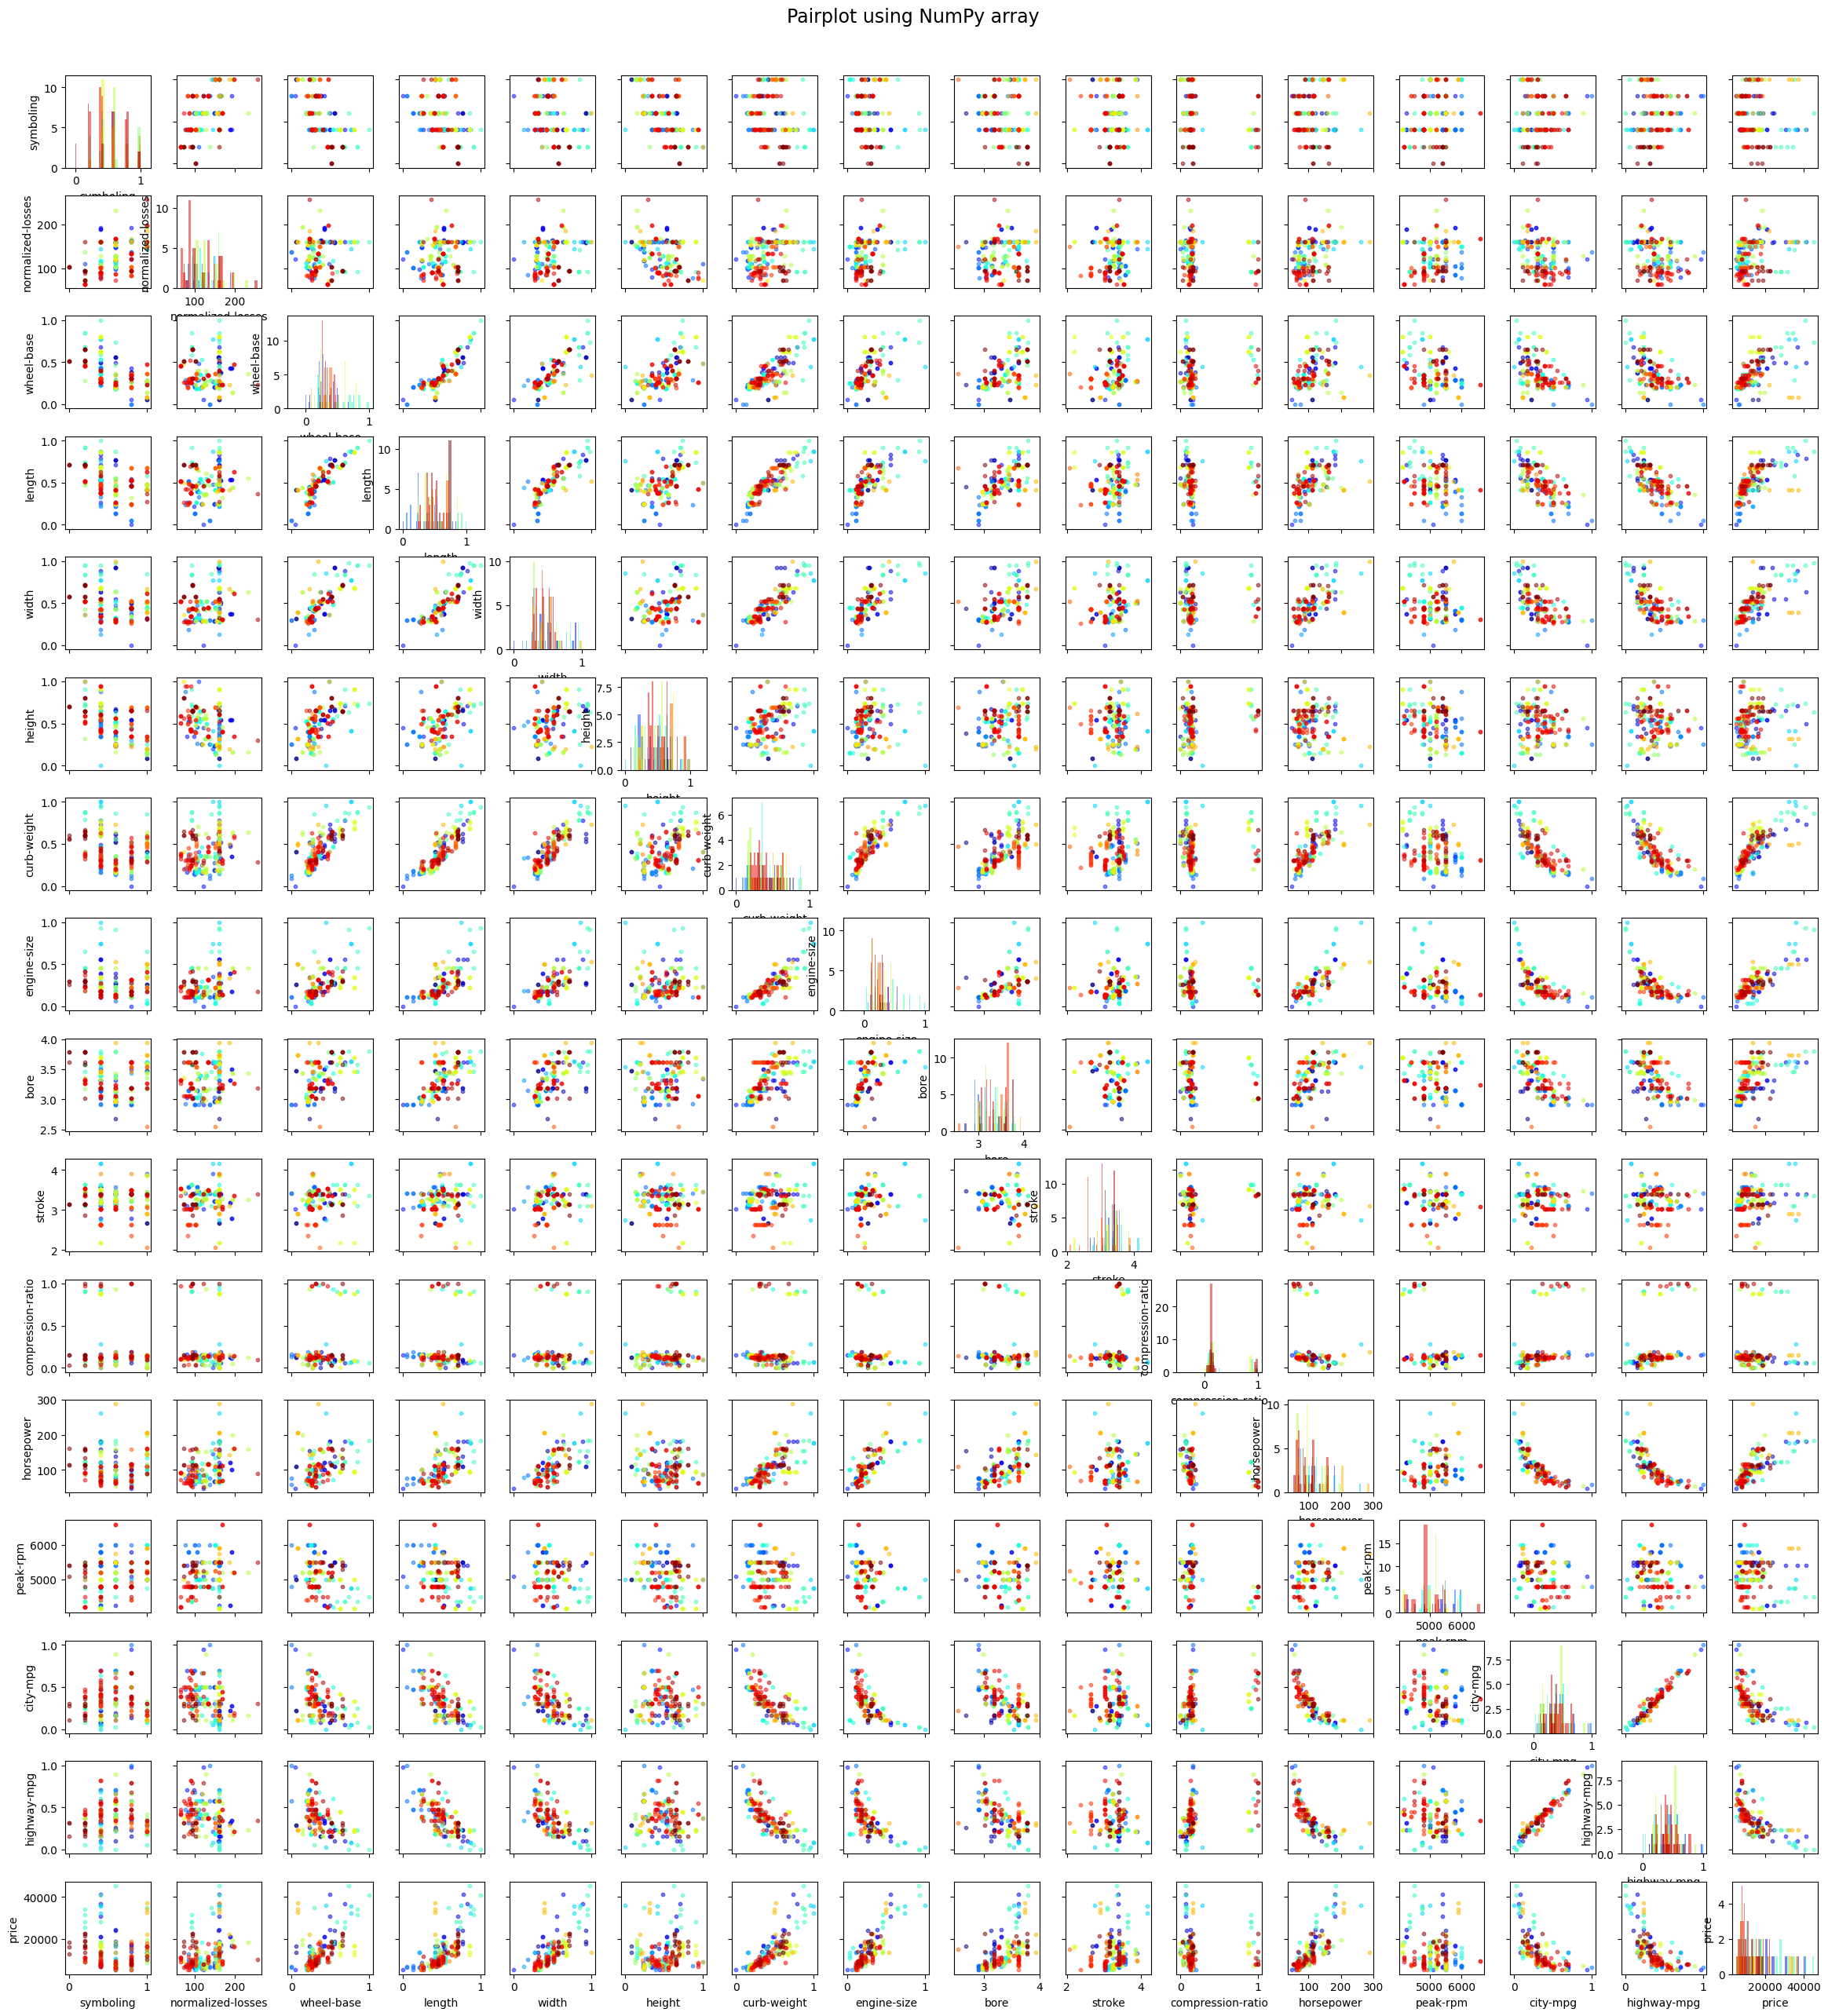


Exec time:  58.8301489999285


In [69]:

start_time = timeit.default_timer()

cols = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
        'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
        'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
        'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

numeric_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height',
                'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_indices = [cols.index(col) for col in numeric_cols]

make_index = cols.index('make')

numeric_data = data[:, numeric_indices].astype(float)

hue_labels = data[:, make_index]

unique_makes = np.unique(hue_labels)

colors = plt.cm.jet(np.linspace(0, 1, len(unique_makes)))
color_dict = {make: color for make, color in zip(unique_makes, colors)}

n_vars = numeric_data.shape[1]

fig, axes = plt.subplots(n_vars, n_vars, figsize=(1.8 * n_vars, 1.8 * n_vars))

for i in range(n_vars):
    for j in range(n_vars):
        ax = axes[i, j]
        if i == j:
            for make in unique_makes:
                vals = numeric_data[hue_labels == make, i]
                ax.hist(vals, bins=20, color=color_dict[make], alpha=0.5)

            ax.set_xlabel(numeric_cols[j])
            ax.set_ylabel(numeric_cols[i])
        else:
            for make in unique_makes:
                xi = numeric_data[hue_labels == make, j]
                yi = numeric_data[hue_labels == make, i]
                ax.scatter(xi, yi, color=color_dict[make], s=10, alpha=0.5)

            if i == n_vars - 1:
                ax.set_xlabel(numeric_cols[j])
            else:
                ax.set_xticklabels([])
            if j == 0:
                ax.set_ylabel(numeric_cols[i])
            else:
                ax.set_yticklabels([])


fig.subplots_adjust(top=0.95, wspace=0.3, hspace=0.3)
fig.suptitle('Pairplot using NumPy array', fontsize=17)
plt.show()

stop_time = timeit.default_timer()
print("\nExec time: ", stop_time - start_time)





|   Завдання  | Pandas (1) | Numpy Array (1) | Pandas (2) | Numpy Array (2) |
|-------------|------------|-----------------|------------|-----------------|
|  |  | Рівень 1 |  |  |
| Завантаження даних |  6.45 | 12.94 | - | - |
| Завдання №1 (вибірка) |  0.007 |  0.025 | - | - |
| Завдання №2 (вибірка) | 0.153 | 0.226 | - | - |
| Завдання №3 (вибірка) | 0.025 | 0.045 | - | - |
| Завдання №4 (вибірка + середнє) | 0.212 |  0.19 | - | - |
| Завдання №5 (вибірка) | 0.108 | 0.085 | - | - |
|  |  | Рівень 2 |  |  |
| Завантаження даних | - | - | 0.006 | 0.01 |
| Завдання №1 (зниклі дані - видалити) | - | - | 0.052 | 0.02 |
| Завдання №1 (зниклі дані - заміна на моду) | - | - | 0.002 | 0.001 |
| Завдання №2 (нормалізація) | - | - | 0.003 | 0.003 |
| Завдання №2 (стандартизація) | - | - | 0.007 | 0.005 |
| Завдання №3 (побудова гістограми) | - | - | 0.123 | 0.909 |
| Завдання №4 (побудова графіку залежності) | - | - | 0.133 |  0.124 |
| Завдання №5 (коефіцієнти Пірсона та Спірсона) | - | - | 0.003 | 0.002 |
| Завдання №6 (One Hot Encoding) | - | - | 0.004 |  0.002 |
| Завдання №7 (pairplot) | - | - | 21.1 | 58.8 |